From https://medium.com/spatial-data-science/deep-learning-for-geospatial-data-applications-multi-label-classification-2b0a1838fcf3

Basically works through https://docs.fast.ai/tutorial.vision.html

In [1]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

'[' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
from fastai.vision.all import *

## Set up Data

In [ ]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

--2020-12-03 05:57:53--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘UCMerced_LandUse.zip’

UCMerced_LandUse.zi 100%[===================>] 317.07M  17.4MB/s    in 40s     

2020-12-03 05:58:33 (7.97 MB/s) - ‘UCMerced_LandUse.zip’ saved [332468434/332468434]



In [ ]:
!unzip UCMerced_LandUse.zip

Archive:  UCMerced_LandUse.zip
   creating: UCMerced_LandUse/Images/
   creating: UCMerced_LandUse/Images/agricultural/
  inflating: UCMerced_LandUse/Images/agricultural/agricultural00.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural01.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural02.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural03.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural04.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural05.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural06.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural07.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural08.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural09.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural10.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural11.tif  
  inflating: UCMerced_LandUs

In [ ]:
path = Path("/content/UCMerced_LandUse/Images")
items = get_image_files(path)
items

(#2100) [Path('/content/UCMerced_LandUse/Images/beach/beach40.tif'),Path('/content/UCMerced_LandUse/Images/beach/beach05.tif'),Path('/content/UCMerced_LandUse/Images/beach/beach56.tif'),Path('/content/UCMerced_LandUse/Images/beach/beach95.tif'),Path('/content/UCMerced_LandUse/Images/beach/beach03.tif'),Path('/content/UCMerced_LandUse/Images/beach/beach09.tif'),Path('/content/UCMerced_LandUse/Images/beach/beach81.tif'),Path('/content/UCMerced_LandUse/Images/beach/beach35.tif'),Path('/content/UCMerced_LandUse/Images/beach/beach18.tif'),Path('/content/UCMerced_LandUse/Images/beach/beach86.tif')...]

FastAI gets labels from the filenames in the folders

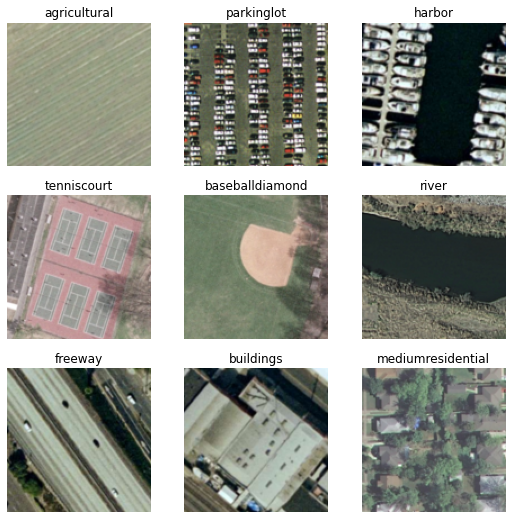

In [ ]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),  get_items=get_image_files,  splitter=RandomSplitter(valid_pct=0.3, seed=42), get_y=parent_label, item_tfms=Resize(128))
dls = data.dataloaders(path, item_tfms=Resize(128))
dls.valid.show_batch()

## Train Deep learning Model (Transfer Learning)

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.004365158267319202)

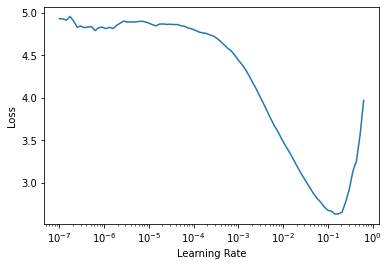

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.lr_find()

In [16]:
learn.fine_tune(25, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.026104,0.235085,0.074603,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.014987,0.237972,0.074603,00:05
1,0.011386,0.219872,0.063492,00:05
2,0.011278,0.222860,0.068254,00:04
3,0.013370,0.240818,0.061905,00:05
4,0.016152,0.329826,0.080952,00:05
5,0.024242,0.402720,0.080952,00:05
6,0.038870,0.479293,0.088889,00:05
7,0.039882,0.296979,0.071429,00:05
8,0.036107,0.308891,0.079365,00:04
9,0.033031,0.400266,0.088889,00:04


In [17]:
# learn.fine_tune(5, 3e-3) - final error 0.084127
# learn.fine_tune(25, 3e-3) - final error 0.042857

## Interpretation

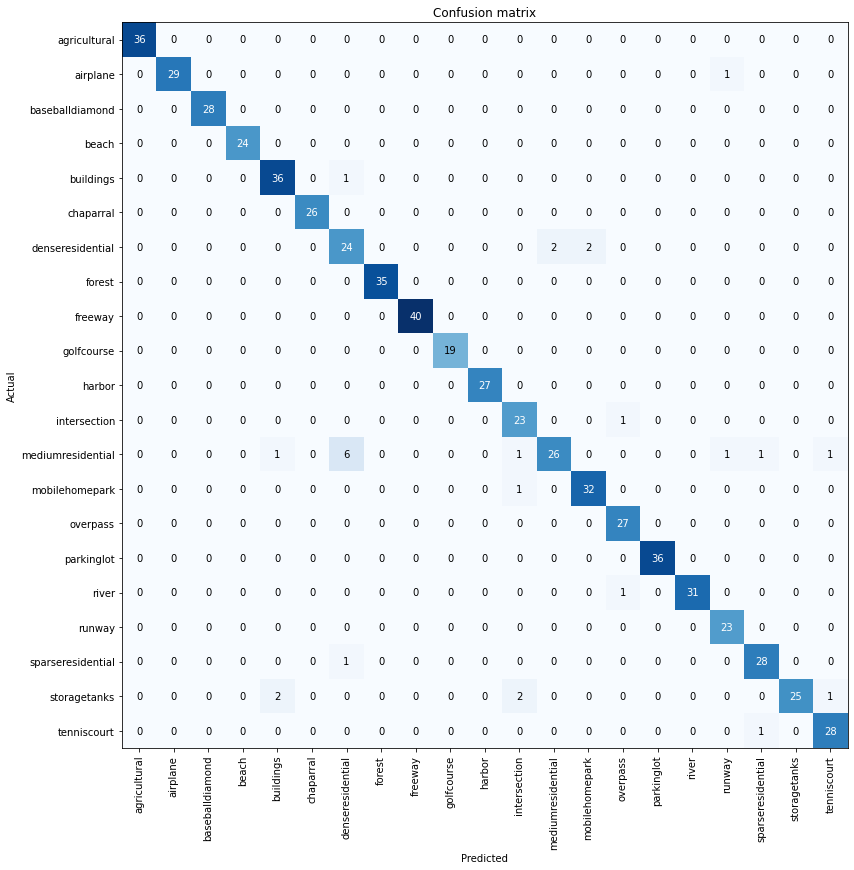

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12))

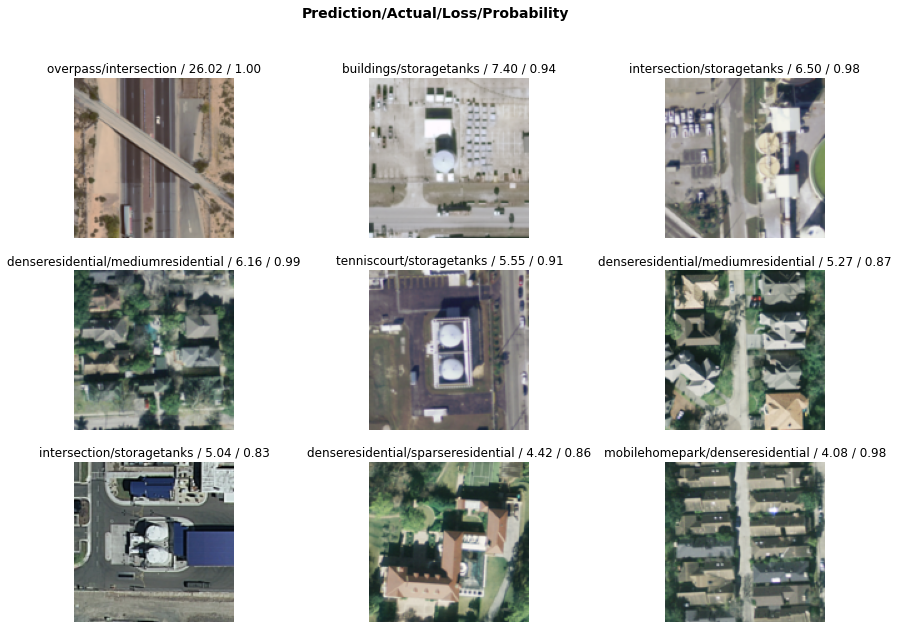

In [19]:
interp.plot_top_losses(9, figsize=(15,10))

Summary: ~ 95% accuracy easily achievable. The reported errors are pretty unsurprising, e.g. medium and dense residential

## Inference

In [ ]:
# learn.predict("/content/30_centimeter_satellite_imagery_CHL_Santiago_Airport_1.jpg")[0]